# DATA COLLECTION

In [1]:
!pip install --upgrade pip

In [2]:
!pip3 install twint
!pip install tweepy
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio

In [47]:
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import tweepy
import json
import random
import os
from tqdm import tqdm, notebook
import numpy as np

In [48]:
#APPLY FOR TWITTER API AND USE YOUR KEY AND TOKENS BELOW
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'rPfvJDXbyaF0QXodea4s9VTxL'
consumer_secret = 'NmtGiNkbu4XioJdpj7avLA1u2ixbcIZaIb4Jr4D73MC4pDq7Jd'
access_token = '3979400294-6egzaaphx67tBd4zwwRqWSUh0OUmhQk95DMTWAY'
access_token_secret = 'LjHyacX8fMiH4VIl8j0Ot0YStASkf89E2MraZg0sAZegv'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [49]:
search_words = "@Zara+-filter:retweets"
date_since = "2022-07-17"

#Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since=date_since).items(2000)
#CHANGE THE ITEM(900) ABOVE TO THE NUMBER OF TWEETS THAT YOU WANT TO COLLECT 

In [50]:
tweets_text = []

In [51]:
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)

0it [00:00, ?it/s]Unexpected parameter: since
1it [00:00,  3.12it/s]Unexpected parameter: since
16it [00:00, 30.68it/s]Unexpected parameter: since
31it [00:00, 36.78it/s]Unexpected parameter: since
46it [00:01, 41.02it/s]Unexpected parameter: since
61it [00:01, 45.29it/s]Unexpected parameter: since
76it [00:01, 47.28it/s]Unexpected parameter: since
91it [00:02, 48.34it/s]Unexpected parameter: since
106it [00:02, 48.56it/s]Unexpected parameter: since
121it [00:02, 49.47it/s]Unexpected parameter: since
136it [00:03, 50.99it/s]Unexpected parameter: since
151it [00:03, 50.49it/s]Unexpected parameter: since
166it [00:03, 50.09it/s]Unexpected parameter: since
181it [00:03, 49.58it/s]Unexpected parameter: since
196it [00:04, 50.57it/s]Unexpected parameter: since
211it [00:04, 44.88it/s]Unexpected parameter: since
226it [00:04, 46.59it/s]Unexpected parameter: since
241it [00:05, 47.39it/s]Unexpected parameter: since
256it [00:05, 46.82it/s]Unexpected parameter: since
271it [00:05, 48.32it/s]Un

In [52]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

100%|██████████| 572/572 [02:12<00:00,  4.31it/s]


In [53]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,мαυяα,"New York, NY",@JustinBieber followed 5/29/11 - Justin dmed m...,2011-03-23 21:23:22+00:00,7160,768,959,False,2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,None,Twitter for iPhone,False
0,linda,Canada,,2022-04-26 16:35:01+00:00,5,23,154,False,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,None,Twitter Web App,False
0,2022 is my year,"Cape Town, S.A.",God is my navigator,2009-07-20 22:24:20+00:00,818,754,5490,False,2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,None,Twitter for iPhone,False
0,2022 is my year,"Cape Town, S.A.",God is my navigator,2009-07-20 22:24:20+00:00,818,754,5490,False,2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,None,Twitter for iPhone,False
0,Tara Carpenter's Missing Inhaler,Bolton,Oh so you're Mrs Right are you?,2010-06-06 00:56:21+00:00,1130,1034,29982,False,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,None,Twitter for Android,False


In [54]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

all tweets: (572, 13)


In [55]:
tweets_df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [56]:
tweets=tweets_df.drop(['user_friends', 'user_name','user_description','user_followers','user_favourites','user_friends', 'hashtags', 'source','user_verified','user_created',], axis=1)

In [57]:
tweets.head()

,user_location,date,text,is_retweet
0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False
0,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False
0,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False
0,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False
0,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False


In [58]:
tweets.tail()

,user_location,date,text,is_retweet
0,"MNTRY, NL - HTOWN",2022-07-17 01:23:17+00:00,@ZARA the audacity you have to charge 10¢ for ...,False
0,,2022-07-17 01:13:44+00:00,@LPelotshweu @Vuyo_Foba @ZaraSouthAfrica @zara...,False
0,Johannesburg,2022-07-17 01:07:19+00:00,@ZARA @OG_Sibzo @ZARA_Care Woolies being the o...,False
0,,2022-07-17 01:02:07+00:00,@JaanHendrix @ZARA @LPelotshweu You do underst...,False
0,,2022-07-17 01:02:00+00:00,@mrNATUREglobal @ZARA @LPelotshweu You do unde...,False


In [59]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

all tweets: (572, 13)


In [60]:
tweets['text'].nunique()

569

In [61]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [64]:
#Cleaning Tweets
import re 
from textblob import TextBlob 
import emoji  

def clean_tweet(text): 
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic

    return text

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

In [65]:
tweets['cleaned_text']=tweets['text'].apply(clean_tweet)
tweets['cleaned_text']=tweets['cleaned_text'].apply(remove_emoji)

<ipython-input-64-97d422f0bdb6>:20: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return emoji.get_emoji_regexp().sub(u'', text)


In [66]:
# Remove stop words
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [67]:
tweets.head()

,user_location,date,text,is_retweet,cleaned_text
0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False,did ever help this? i’m problem i’ve contacted...
0,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False,cynthia fantastic look today hat lainey suits ...
0,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False,_care did get money? cause i experienced thing.
0,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False,i woke purchase zara nesburg zaza made 02:17. ...
0,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False,even states handled ego


# DATA CLEANING

In [69]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

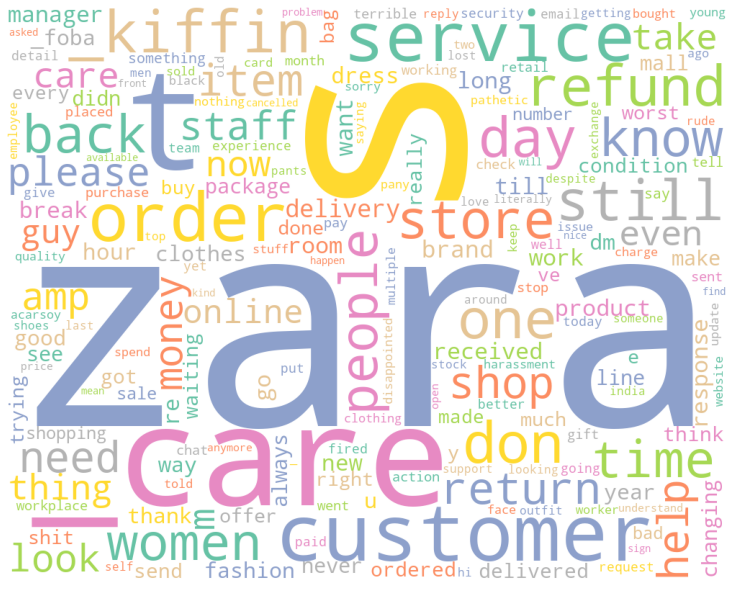

In [70]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweets.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [72]:
tweets.to_csv("DataOne.csv")

In [73]:
##Merge all the data scraped from every week
#Change the names of the CSV Files to the keywords you used for each search to make it easy for located your dataset

Tweets1 = pd.read_csv("DataOne.csv")
##Tweets2 = pd.read_csv("Name2.csv")##
##Tweets3 = pd.read_csv("Name3.csv")##

In [74]:
## merge all dataframes
df_list = [Tweets1]
df = pd.concat(df_list)

In [75]:
df.head()

,Unnamed: 0,user_location,date,text,is_retweet,cleaned_text
0,0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False,did ever help this? i’m problem i’ve contacted...
1,0,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False,cynthia fantastic look today hat lainey suits ...
2,0,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False,_care did get money? cause i experienced thing.
3,0,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False,i woke purchase zara nesburg zaza made 02:17. ...
4,0,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False,even states handled ego


In [76]:
##Save your combined dataset

df.to_csv("Combined_Dataset.csv")

In [77]:
df=pd.read_csv("Combined_Dataset.csv")

# Data Analysis

In [78]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [79]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [80]:
tweets.dropna(subset=['cleaned_text'], inplace = True)
tweets.reset_index(drop=True, inplace=True)

In [81]:
tweets['Subjectivity'] = tweets['cleaned_text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['cleaned_text'].apply(getPolarity)
tweets.head()

,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity
0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False,did ever help this? i’m problem i’ve contacted...,0.00,0.00
1,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False,cynthia fantastic look today hat lainey suits ...,0.75,0.55
2,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False,_care did get money? cause i experienced thing.,0.90,0.80
3,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False,i woke purchase zara nesburg zaza made 02:17. ...,0.00,0.00
4,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False,even states handled ego,0.00,0.00


In [82]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

tweets['Analysis_Polarity'] = tweets['Polarity'].apply(get_Polarity_Analysis)

tweets['Analysis_Subjectivity'] = tweets['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
tweets.head()



,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False,did ever help this? i’m problem i’ve contacted...,0.00,0.00,Neutral,Fact
1,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False,cynthia fantastic look today hat lainey suits ...,0.75,0.55,Positive,Opinion
2,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False,_care did get money? cause i experienced thing.,0.90,0.80,Positive,Opinion
3,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False,i woke purchase zara nesburg zaza made 02:17. ...,0.00,0.00,Neutral,Fact
4,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False,even states handled ego,0.00,0.00,Neutral,Fact


In [83]:
tweets.to_csv("PolaritySubjectivityInnovation.csv")

In [84]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   user_location          572 non-null    object             
 1   date                   572 non-null    datetime64[ns, UTC]
 2   text                   572 non-null    object             
 3   is_retweet             572 non-null    bool               
 4   cleaned_text           572 non-null    object             
 5   Subjectivity           572 non-null    float64            
 6   Polarity               572 non-null    float64            
 7   Analysis_Polarity      572 non-null    object             
 8   Analysis_Subjectivity  572 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 36.4+ KB


# SENTIMENT ANALYSIS

In [85]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

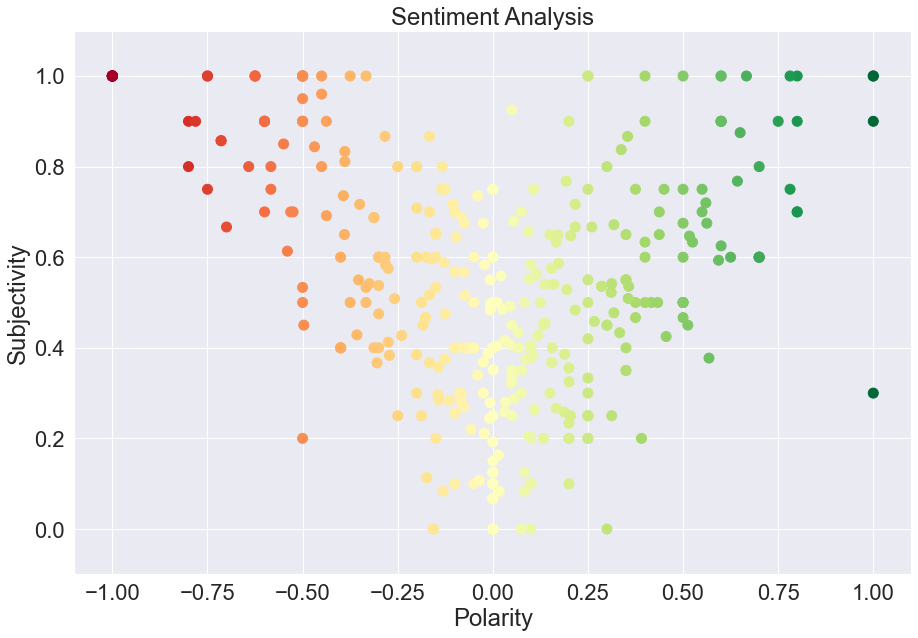

(None,)

In [86]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweets['Polarity'], tweets['Subjectivity'], c=tweets['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [87]:
# Show the value counts
tweets['Analysis_Polarity'].value_counts()

Neutral     222
Positive    182
Negative    168
Name: Analysis_Polarity, dtype: int64

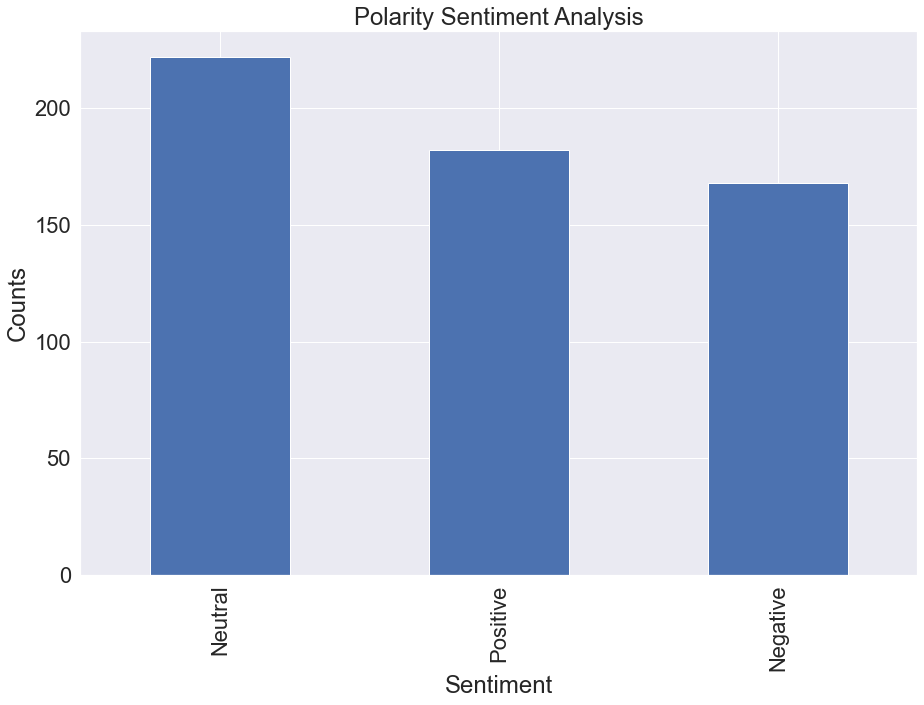

In [89]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

# Sentiment Analysis Pie Chart

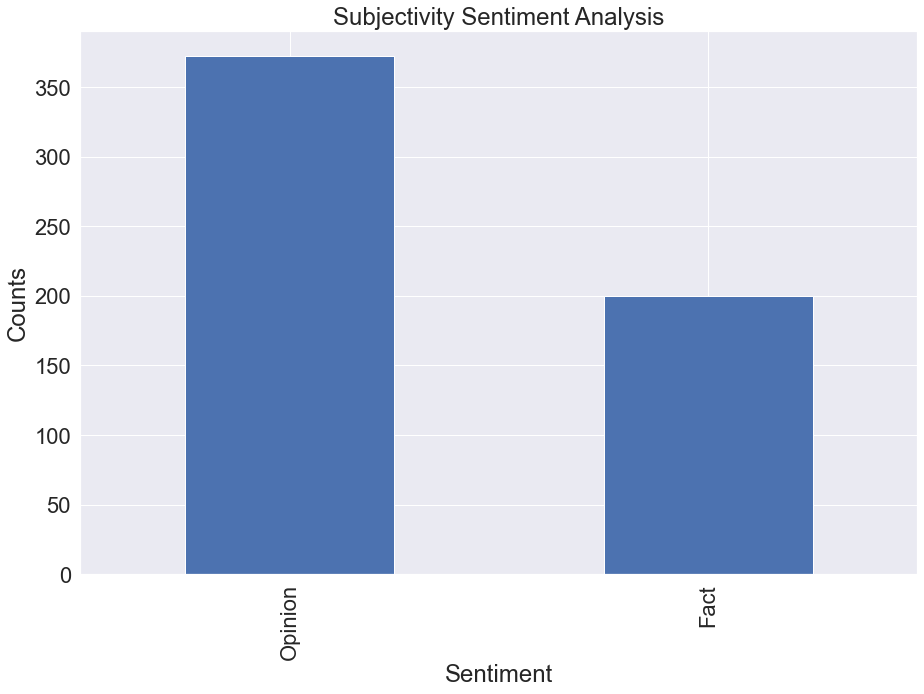

In [90]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [91]:
# Show the value counts
tweets['Analysis_Subjectivity'].value_counts()

Opinion    372
Fact       200
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [116]:
!pip install pyLDAvis

In [100]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(572, 69)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(572, 69)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\athoi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [103]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=50)

In [104]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-6:]])
    print('\n')

Top 10 words for topic #0:
['product', 'want', 'customer', 'store', 'refund', 'zara']


Top 10 words for topic #1:
['money', 'shit', 'clothes', 'time', 'people', 'amp']


Top 10 words for topic #2:
['guys', 'item', 'money', 'service', 'return', 'customer']


Top 10 words for topic #3:
['terrible', 'make', 'help', 'days', 'need', 'women']


Top 10 words for topic #4:
['service', 'delivery', 'delivered', 'received', 'don', 'order']


Top 10 words for topic #5:
['rooms', 'thing', 'manager', 'changing', 'care', 'shop']


Top 10 words for topic #6:
['check', 'fashion', 'customers', 'new', 'staff', 'look']


Top 10 words for topic #7:
['service', 'good', 'really', 'long', 'dress', 'like']




C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.232115 -0.015803       1        1  17.663025
2      0.207289 -0.013454       2        1  14.762093
4      0.172330 -0.017197       3        1  14.695037
6     -0.177422  0.004905       4        1  10.866272
1     -0.111423  0.147714       5        1  10.827222
5     -0.262501 -0.159993       6        1  10.782119
7     -0.003685 -0.230055       7        1  10.368103
3     -0.056702  0.283882       8        1  10.036128, topic_info=        Term       Freq      Total Category  logprob  loglift
68      zara  83.000000  83.000000  Default  30.0000  30.0000
36     order  46.000000  46.000000  Default  29.0000  29.0000
64     women  29.000000  29.000000  Default  28.0000  28.0000
25      like  26.000000  26.000000  Default  27.0000  27.0000
32      need  23.000000  23.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
31     money   0.122968  24.376406   Topic8  -7.0069  -2.9905
45  response   0.122952  14.844370   Topic8  -7.0071  -2.4946
9   customer   0.122951  50.001143   Topic8  -7.0071  -3.7090
21      guys   0.122945  15.706950   Topic8  -7.0071  -2.5511
8    clothes   0.122943  15.675331   Topic8  -7.0071  -2.5491

[339 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         5  0.979327     amp
1         4  0.604080     bad
1         5  0.086297     bad
1         8  0.258891     bad
2         4  0.471743  brands
...     ...       ...     ...
67        1  0.490387   worst
67        3  0.326925   worst
67        4  0.081731   worst
67        5  0.081731   worst
68        1  0.981552    zara

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 7, 2, 6, 8, 4])

In [106]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(572, 8)

In [107]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False,did ever help this? i’m problem i’ve contacted...,0.00,0.00,Neutral,Fact
1,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False,cynthia fantastic look today hat lainey suits ...,0.75,0.55,Positive,Opinion
2,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False,_care did get money? cause i experienced thing.,0.90,0.80,Positive,Opinion
3,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False,i woke purchase zara nesburg zaza made 02:17. ...,0.00,0.00,Neutral,Fact
4,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False,even states handled ego,0.00,0.00,Neutral,Fact


In [116]:
tweets.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_location', 'date', 'text', 'is_retweet', 'cleaned_text',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

In [190]:
tweets_1=tweets.replace({0:'Customer Service',1:'Quality',2:'Return Policy',3:'Influencer',4:'Staff',5:'Fashion',6:'Price',7:'Pay'})

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
tweets_1['Topic'] = topic_values.argmax(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
tweets['Topic'] = topic_values.argmax(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [193]:
tweets_1.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,"New York, NY",2022-07-22 01:13:12+00:00,@GemmaaAspinall @ZARA Did they ever help you w...,False,did ever help this? i’m problem i’ve contacted...,Customer Service,Customer Service,Neutral,Fact,3
1,Canada,2022-07-22 00:32:14+00:00,@TheSocialCTV @melissagrelo @BananaRepublic @L...,False,cynthia fantastic look today hat lainey suits ...,0.75,0.55,Positive,Opinion,7
2,"Cape Town, S.A.",2022-07-22 00:31:57+00:00,@NeoNtsoalikane @ZARA_Care @ZARA @CapitecBankS...,False,_care did get money? cause i experienced thing.,0.9,0.8,Positive,Opinion,5
3,"Cape Town, S.A.",2022-07-22 00:30:25+00:00,I just woke up to a purchase from zara nesburg...,False,i woke purchase zara nesburg zaza made 02:17. ...,Customer Service,Customer Service,Neutral,Fact,0
4,Bolton,2022-07-22 00:14:51+00:00,@floellaumbagabe @Joshtwhee1er @ZARA @DanniiMi...,False,even states handled ego,Customer Service,Customer Service,Neutral,Fact,0


In [194]:
tweets_1.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_location', 'date', 'text', 'is_retweet', 'cleaned_text',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2880x1800 with 0 Axes>

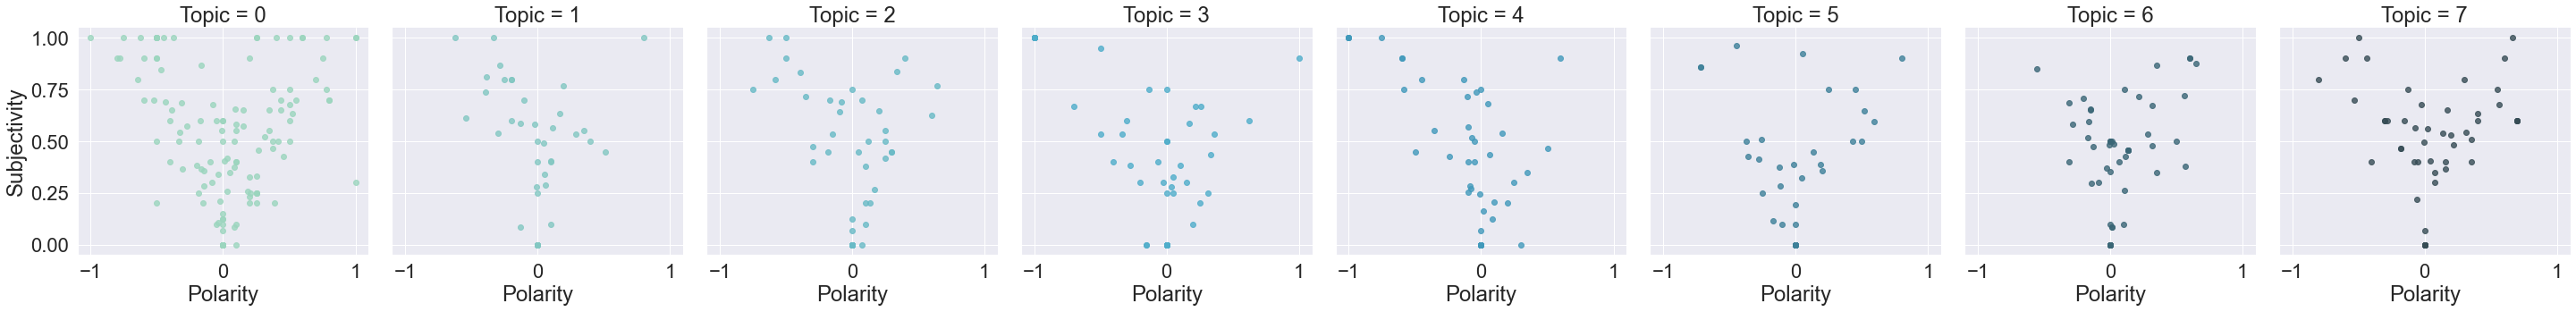

In [195]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=tweets, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [196]:
tweets_2= tweets_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

tweets_2

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,48,109,60
1,16,10,14
2,14,29,19
3,20,16,15
4,24,21,12
5,13,16,12
6,14,13,26
7,19,8,24


In [197]:
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  8 non-null      int64
 1   Neutral   8 non-null      int64
 2   Positive  8 non-null      int64
dtypes: int64(3)
memory usage: 256.0 bytes


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
tweets_2['Total'] = tweets_2.sum(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
tweets_2.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [200]:
for i in tweets_2:
    tweets_2[i] = round(tweets_2[i]*100/tweets_2.Total)

tweets_2

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,22.0,50.0,28.0,100.0
1,40.0,25.0,35.0,100.0
2,23.0,47.0,31.0,100.0
3,39.0,31.0,29.0,100.0
4,42.0,37.0,21.0,100.0
5,32.0,39.0,29.0,100.0
6,26.0,25.0,49.0,100.0
7,37.0,16.0,47.0,100.0


In [201]:
tweets_2=tweets_2.fillna(0)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
#Conduct Polarity Topic Analysis using Tableau

tweets_2.to_excel("Polarity_Topic Modeling.xlsx")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [205]:
#tweets_2= tweets_2.drop(['Total'], axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


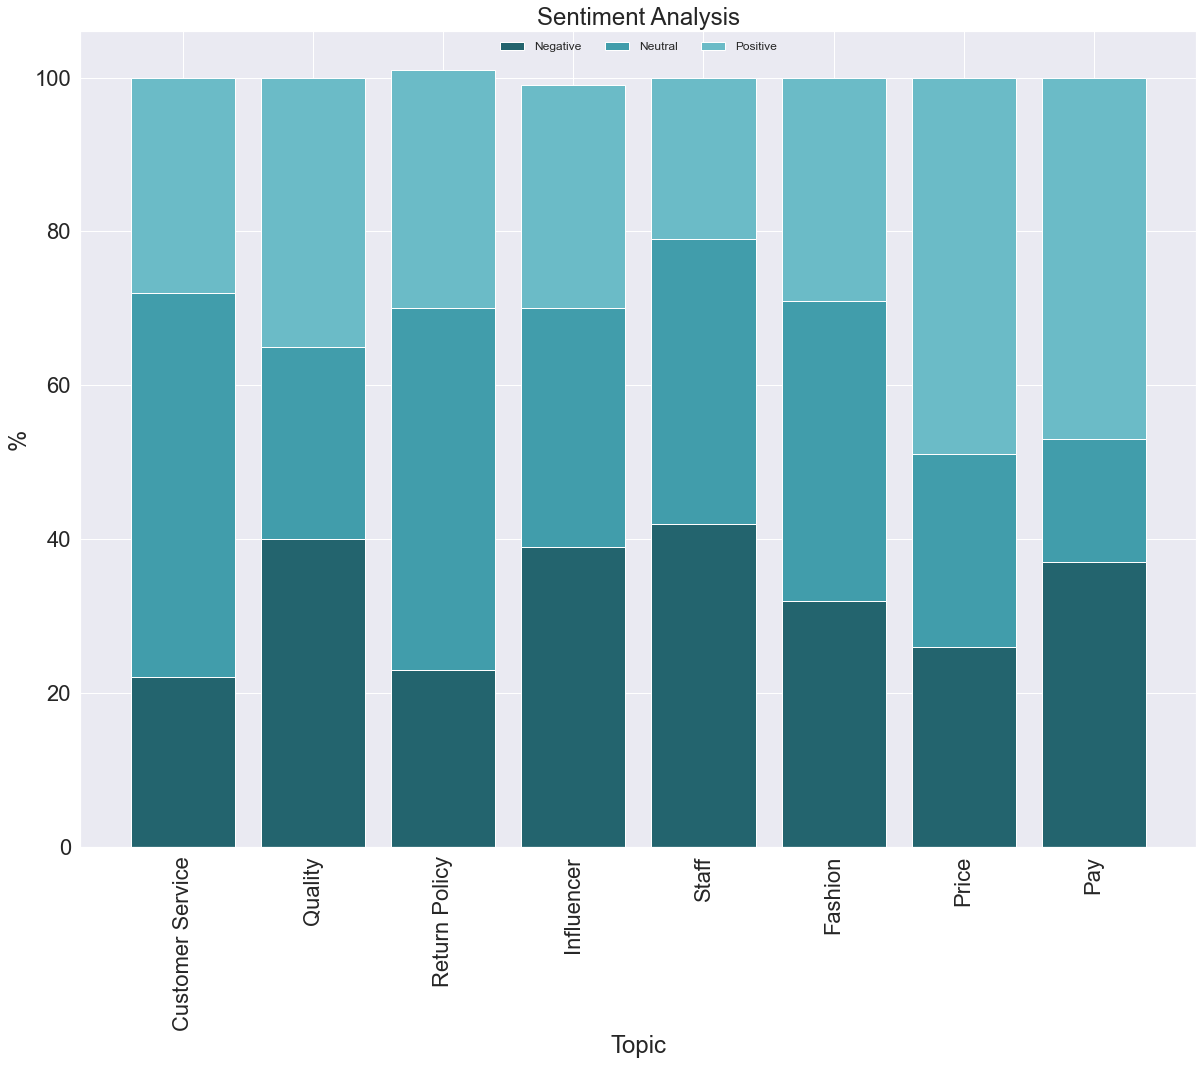

In [206]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = ['Customer Service','Quality','Return Policy','Influencer','Staff','Fashion','Price','Pay']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,tweets_2['Negative'], color='#23646e')
p2=plt.bar(topic,tweets_2['Neutral'], color='#419dab', bottom=tweets_2['Negative'])
p3=plt.bar(topic,tweets_2['Positive'], color='#6bbbc7', bottom=tweets_2['Neutral']+tweets_2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()
